In [1]:
import csv
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

2022-07-23 15:27:48.031784: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-07-23 15:27:48.034450: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-23 15:27:48.034459: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

In [3]:
NUM_CLASSES = 4

In [13]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [14]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [15]:
RANDOM_SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 42)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                860       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1,114
Trainable params: 1,114
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [19]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/6 [====>.........................] - ETA: 0s - loss: 1.4891 - accuracy: 0.1719
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 22ms/step - loss: 1.4194 - accuracy: 0.1976 - val_loss: 1.3871 - val_accuracy: 0.2960
Epoch 2/1000
1/6 [====>.........................] - ETA: 0s - loss: 1.3339 - accuracy: 0.2656
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 1.3837 - accuracy: 0.2537 - val_loss: 1.3562 - val_accuracy: 0.4200
Epoch 3/1000
1/6 [====>.........................] - ETA: 0s - loss: 1.3304 - accuracy: 0.3125
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 1.3372 - accuracy: 0.2884 - val_loss: 1.3259 - val_accuracy: 0.4440
Epoch 4/1000
1/6 [====>.........................] - ETA: 0s - loss: 1.2896 - accuracy: 0.2734
Epoch 4: savin

6/6 [==============================] - 0s 5ms/step - loss: 0.8518 - accuracy: 0.6328 - val_loss: 0.6824 - val_accuracy: 0.7480
Epoch 29/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.7734 - accuracy: 0.7031
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.8144 - accuracy: 0.6983 - val_loss: 0.6689 - val_accuracy: 0.7920
Epoch 30/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.7583 - accuracy: 0.7109
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.8117 - accuracy: 0.6555 - val_loss: 0.6488 - val_accuracy: 0.7960
Epoch 31/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.8239 - accuracy: 0.6562
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.7838 - accuracy: 0.6849 - val_loss: 0.6248

Epoch 56/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.5129 - accuracy: 0.7734
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.5127 - accuracy: 0.7650 - val_loss: 0.3603 - val_accuracy: 0.9480
Epoch 57/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.4744 - accuracy: 0.7656
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.4920 - accuracy: 0.7570 - val_loss: 0.3560 - val_accuracy: 0.9480
Epoch 58/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.5085 - accuracy: 0.7891
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.5034 - accuracy: 0.7490 - val_loss: 0.3521 - val_accuracy: 0.9600
Epoch 59/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.4515 - accuracy: 0.7656
Epoch 59

6/6 [==============================] - 0s 5ms/step - loss: 0.4263 - accuracy: 0.7971 - val_loss: 0.2785 - val_accuracy: 0.9680
Epoch 84/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.3680 - accuracy: 0.8516
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.4021 - accuracy: 0.8131 - val_loss: 0.2752 - val_accuracy: 0.9680
Epoch 85/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.4306 - accuracy: 0.7812
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.4161 - accuracy: 0.7931 - val_loss: 0.2714 - val_accuracy: 0.9720
Epoch 86/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.3417 - accuracy: 0.8672
Epoch 86: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.4342 - accuracy: 0.7770 - val_loss: 0.2692

Epoch 111/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.3639 - accuracy: 0.8203
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.3623 - accuracy: 0.8224 - val_loss: 0.2181 - val_accuracy: 0.9840
Epoch 112/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.3647 - accuracy: 0.8203
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.3801 - accuracy: 0.8184 - val_loss: 0.2183 - val_accuracy: 0.9840
Epoch 113/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.3412 - accuracy: 0.8359
Epoch 113: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.3572 - accuracy: 0.8344 - val_loss: 0.2177 - val_accuracy: 0.9720
Epoch 114/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.3576 - accuracy: 0.8047
E

1/6 [====>.........................] - ETA: 0s - loss: 0.3472 - accuracy: 0.8047
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.3162 - accuracy: 0.8558 - val_loss: 0.1711 - val_accuracy: 0.9880
Epoch 139/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.2370 - accuracy: 0.9062
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.3094 - accuracy: 0.8678 - val_loss: 0.1687 - val_accuracy: 0.9880
Epoch 140/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.3263 - accuracy: 0.8828
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.3360 - accuracy: 0.8505 - val_loss: 0.1666 - val_accuracy: 0.9880
Epoch 141/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.3633 - accuracy: 0.8516
Epoch 141: savin

1/6 [====>.........................] - ETA: 0s - loss: 0.3165 - accuracy: 0.8828
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.3158 - accuracy: 0.8598 - val_loss: 0.1405 - val_accuracy: 0.9880
Epoch 166/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.2798 - accuracy: 0.8438
Epoch 166: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.3053 - accuracy: 0.8438 - val_loss: 0.1402 - val_accuracy: 0.9880
Epoch 167/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.2254 - accuracy: 0.8984
Epoch 167: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.3049 - accuracy: 0.8745 - val_loss: 0.1413 - val_accuracy: 0.9880
Epoch 168/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.3709 - accuracy: 0.8359
Epoch 168: savin

1/6 [====>.........................] - ETA: 0s - loss: 0.3880 - accuracy: 0.8594
Epoch 192: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.3231 - accuracy: 0.8558 - val_loss: 0.1302 - val_accuracy: 0.9880
Epoch 193/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.2670 - accuracy: 0.8281
Epoch 193: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.3384 - accuracy: 0.8278 - val_loss: 0.1344 - val_accuracy: 0.9880
Epoch 194/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.3020 - accuracy: 0.8359
Epoch 194: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.3184 - accuracy: 0.8505 - val_loss: 0.1386 - val_accuracy: 0.9880
Epoch 195/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.3591 - accuracy: 0.8281
Epoch 195: savin

1/6 [====>.........................] - ETA: 0s - loss: 0.3600 - accuracy: 0.8281
Epoch 219: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.2952 - accuracy: 0.8571 - val_loss: 0.1156 - val_accuracy: 0.9920
Epoch 220/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.3068 - accuracy: 0.8281
Epoch 220: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.2708 - accuracy: 0.8678 - val_loss: 0.1183 - val_accuracy: 0.9880
Epoch 221/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.1689 - accuracy: 0.9141
Epoch 221: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.2923 - accuracy: 0.8732 - val_loss: 0.1188 - val_accuracy: 0.9880
Epoch 222/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.3012 - accuracy: 0.8750
Epoch 222: savin

1/6 [====>.........................] - ETA: 0s - loss: 0.1819 - accuracy: 0.9453
Epoch 246: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.2584 - accuracy: 0.8892 - val_loss: 0.1114 - val_accuracy: 0.9840
Epoch 247/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.2307 - accuracy: 0.8828
Epoch 247: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.2554 - accuracy: 0.8838 - val_loss: 0.1078 - val_accuracy: 0.9840
Epoch 248/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.2416 - accuracy: 0.9297
Epoch 248: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.2743 - accuracy: 0.8732 - val_loss: 0.1056 - val_accuracy: 0.9880
Epoch 249/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.3826 - accuracy: 0.8125
Epoch 249: savin

1/6 [====>.........................] - ETA: 0s - loss: 0.2123 - accuracy: 0.9062
Epoch 273: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.2336 - accuracy: 0.8945 - val_loss: 0.1104 - val_accuracy: 0.9840
Epoch 274/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.2870 - accuracy: 0.8750
Epoch 274: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.2747 - accuracy: 0.8772 - val_loss: 0.1050 - val_accuracy: 0.9840
Epoch 275/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.2354 - accuracy: 0.9297
Epoch 275: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.2714 - accuracy: 0.8919 - val_loss: 0.1005 - val_accuracy: 0.9880
Epoch 276/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.2213 - accuracy: 0.8906
Epoch 276: savin

1/6 [====>.........................] - ETA: 0s - loss: 0.2106 - accuracy: 0.9141
Epoch 300: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.2436 - accuracy: 0.8972 - val_loss: 0.0991 - val_accuracy: 0.9880
Epoch 301/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.2298 - accuracy: 0.8984
Epoch 301: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.2682 - accuracy: 0.8812 - val_loss: 0.0982 - val_accuracy: 0.9880
Epoch 302/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.2884 - accuracy: 0.8984
Epoch 302: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
6/6 [==============================] - 0s 5ms/step - loss: 0.2233 - accuracy: 0.9092 - val_loss: 0.0972 - val_accuracy: 0.9880
Epoch 302: early stopping


In [21]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 1ms/step - loss: 0.0972 - accuracy: 0.9880


In [22]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [23]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 41ms/step
[6.6744801e-09 9.9996519e-01 1.2771409e-07 3.4685978e-05]
1


8/8 [==============================] - 0s 815us/step


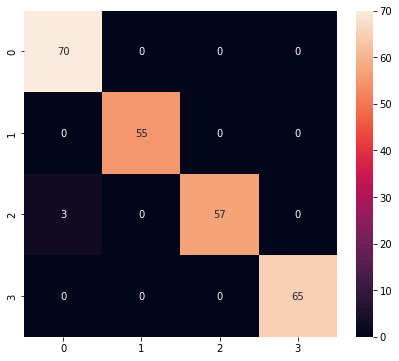

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        70
           1       1.00      1.00      1.00        55
           2       1.00      0.95      0.97        60
           3       1.00      1.00      1.00        65

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [26]:

# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [27]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmp0b0172ma/assets


2022-07-23 15:41:58.593816: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-07-23 15:41:58.593837: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-07-23 15:41:58.594272: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmp0b0172ma
2022-07-23 15:41:58.595081: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-07-23 15:41:58.595096: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /tmp/tmp0b0172ma
2022-07-23 15:41:58.598093: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-07-23 15:41:58.598762: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-07-23 15:41:58.627114: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: /tmp/tmp0b0172ma
2022-07

6516